In [241]:
import pandas as pd
import matplotlib.pyplot as plt

##### Load <code>story_categories_v1.csv</code>

In [242]:
df_story_cat = pd.read_csv("../data/cleaned_data/story_categories_v1.csv")
df_story_cat.head()

,story_id,generic_category_id,basic_category_id,difficulty_id
0,5,2,NaN,NaN
1,6,2,NaN,NaN
2,7,2,NaN,NaN
3,8,2,NaN,NaN
4,9,2,NaN,NaN


In [243]:
df_story_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19772 entries, 0 to 19771
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   story_id             19772 non-null  int64  
 1   generic_category_id  19772 non-null  int64  
 2   basic_category_id    1761 non-null   float64
 3   difficulty_id        6541 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 618.0 KB


In [244]:
# Convert data types
df_story_cat['basic_category_id'] = df_story_cat['basic_category_id'].astype("Int64")
df_story_cat['difficulty_id'] = df_story_cat['difficulty_id'].astype("Int64")

In [245]:
df_story_cat = df_story_cat[df_story_cat['generic_category_id'] != 0]

##### Load <code>story_theme_category_v1.csv</code>

In [246]:
df_story_theme_cat = pd.read_csv("../data/cleaned_data/story_theme_category_v1.csv")
df_story_theme_cat.head()

,story_id,basic_category_id
0,5,1
1,5,3
2,6,1
3,6,3
4,7,1


In [247]:
df_story_theme_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49445 entries, 0 to 49444
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   story_id           49445 non-null  int64
 1   basic_category_id  49445 non-null  int64
dtypes: int64(2)
memory usage: 772.7 KB


##### Load <code>basic_categories_v1.csv</code>

In [248]:
df_basic_categories = pd.read_csv("../data/cleaned_data/basic_categories_v1.csv") 
df_basic_categories.head()

,basic_category_id,generic_category_id,basic_category_name
0,0,0,Directions
1,1,0,Introduction
2,2,0,Closure
3,0,1,Shopping
4,1,1,Gastronomy-Restaurant


In [249]:
df_story_theme_cat = df_story_theme_cat.merge(df_story_cat[['story_id', 'generic_category_id']], on='story_id', how='left')

df_story_theme_cat = df_story_theme_cat.merge(df_basic_categories, on=['generic_category_id', 'basic_category_id'], how='left')

df_story_theme_cat.head()

,story_id,basic_category_id,generic_category_id,basic_category_name
0,5,1,2,Architecture
1,5,3,2,Art
2,6,1,2,Architecture
3,6,3,2,Art
4,7,1,2,Architecture


In [250]:
df_story_theme_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49445 entries, 0 to 49444
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   story_id             49445 non-null  int64 
 1   basic_category_id    49445 non-null  int64 
 2   generic_category_id  49445 non-null  int64 
 3   basic_category_name  49445 non-null  object
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


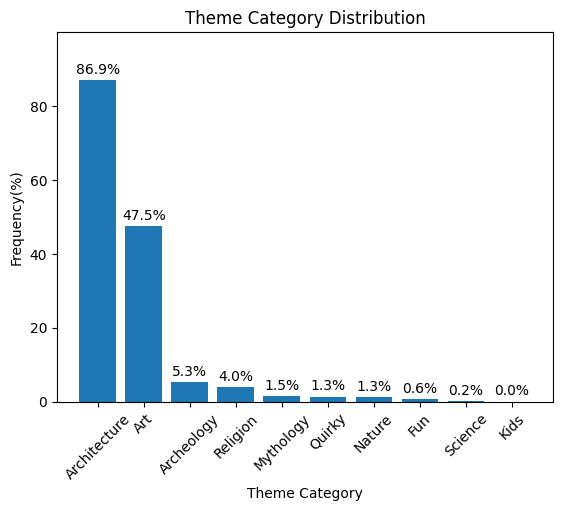

In [251]:
theme_cat_freq = (df_story_theme_cat.groupby('basic_category_name')['story_id'].nunique() / df_story_theme_cat['story_id'].nunique() * 100) \
                        .reset_index(name='frequency') \
                        .sort_values(by='frequency', ascending=False)

theme_cat_freq['frequency'] = round(theme_cat_freq['frequency'], 2)

bars = plt.bar(theme_cat_freq['basic_category_name'], theme_cat_freq['frequency'])
plt.xlabel("Theme Category")
plt.ylabel("Frequency(%)")
plt.title("Theme Category Distribution")
plt.xticks(rotation=45)

# Add percentage labels above bars
for bar, pct in zip(bars, theme_cat_freq["frequency"]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1,  # +1 to lift above bar
             f"{pct:.1f}%", ha='center', va='bottom')

plt.ylim(0, max(theme_cat_freq["frequency"]) * 1.15)  # Extra space above bars
plt.show()
plt.show()

### Theme Category Selection for `item_features` Matrix

To build an effective `item_features` matrix for the LightFM model, we filter theme categories based on their frequency in the dataset to avoid feature sparsity and improve model generalization.

#### ✅ Included Categories (Frequency ≥ 2%):
- **Architecture** (86.94%)
- **Art** (47.50%)
- **Archeology** (5.27%)
- **Religion** (3.98%)

These categories are common enough to provide meaningful signal to the model.

#### ⚠️ Rare Categories (Frequency < 2%):
- Mythology (1.48%)
- Quirky (1.30%)
- Nature (1.28%)
- Fun (0.64%)
- Science (0.19%)
- Kids (0.02%)

These rare categories will be grouped into a single feature: **`Theme_Other`**.  
This grouping helps reduce noise, avoids overfitting, and keeps the feature matrix compact.

By applying this threshold-based filtering and grouping strategy, we ensure that the LightFM model learns from informative and well-represented item features.

In [252]:
df_tips = df_story_cat[df_story_cat['generic_category_id'] == 1]
df_tips.head()

,story_id,generic_category_id,basic_category_id,difficulty_id
1585,2156,1,<NA>,<NA>
1807,2414,1,<NA>,<NA>
2662,3411,1,<NA>,<NA>
2894,3779,1,<NA>,<NA>
2939,3826,1,<NA>,<NA>


In [253]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1037 entries, 1585 to 19758
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   story_id             1037 non-null   int64
 1   generic_category_id  1037 non-null   int64
 2   basic_category_id    257 non-null    Int64
 3   difficulty_id        511 non-null    Int64
dtypes: Int64(2), int64(2)
memory usage: 42.5 KB


In [254]:
df_tips = df_tips.merge(df_basic_categories, on=['generic_category_id', 'basic_category_id'], how='left')
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   story_id             1037 non-null   int64 
 1   generic_category_id  1037 non-null   int64 
 2   basic_category_id    257 non-null    Int64 
 3   difficulty_id        511 non-null    Int64 
 4   basic_category_name  257 non-null    object
dtypes: Int64(2), int64(2), object(1)
memory usage: 42.7+ KB


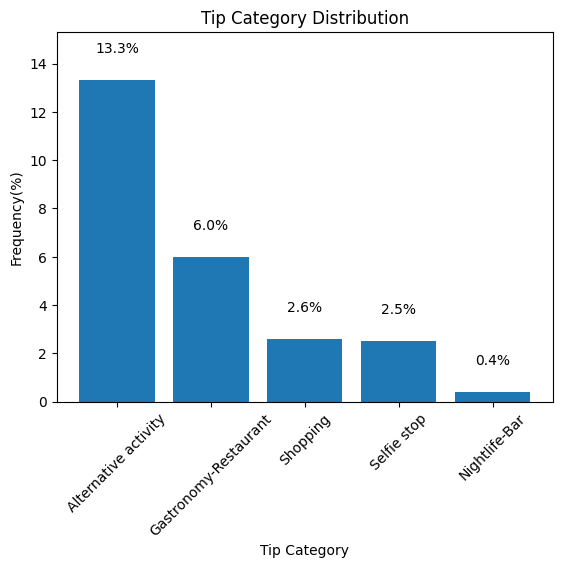

In [255]:
tip_cat_freq = (df_tips.groupby('basic_category_name')['story_id'].nunique() / df_tips['story_id'].nunique() * 100) \
                        .reset_index(name='frequency') \
                        .sort_values(by='frequency', ascending=False)

tip_cat_freq['frequency'] = round(tip_cat_freq['frequency'], 2)

bars = plt.bar(tip_cat_freq['basic_category_name'], tip_cat_freq['frequency'])
plt.xlabel("Tip Category")
plt.ylabel("Frequency(%)")
plt.title("Tip Category Distribution")
plt.xticks(rotation=45)

# Add percentage labels above bars
for bar, pct in zip(bars, tip_cat_freq["frequency"]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1,  # +1 to lift above bar
             f"{pct:.1f}%", ha='center', va='bottom')

plt.ylim(0, max(tip_cat_freq["frequency"]) * 1.15)  # Extra space above bars
plt.show()

### Tip Category Selection for `item_features` Matrix

The `tip_basic_category` is available for only 25% of tip stories. To keep the `item_features` matrix informative yet compact:

- We include **tip categories with frequency ≥ 2%**:
  - Alternative activity (13.31%)
  - Gastronomy-Restaurant (5.98%)
  - Shopping (2.60%)
  - Selfie stop (2.51%)

- The **rare category** `Nightlife-Bar (0.39%)` and **missing values** are grouped into a single category: **`Tip_Other`**

##### Load <code>tour_category_v1.csv</code>

In [256]:
df_tour_cat = pd.read_csv("../data/cleaned_data/tour_category_v1.csv")
df_tour_cat.head()

,tour_id,tour_category_id
0,1,7
1,1,15
2,3,6
3,3,7
4,5,2


In [257]:
df_tour_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   tour_id           1118 non-null   int64
 1   tour_category_id  1118 non-null   int64
dtypes: int64(2)
memory usage: 17.6 KB


##### Load <code>category_v1.csv</code>

In [258]:
df_tour_cat_names = pd.read_csv("../data/cleaned_data/category_v1.csv")
df_tour_cat_names.head()

,tour_category_id,tour_category_name
0,1,Literature
1,2,Performing arts
2,3,Gastronomy
3,4,Media arts
4,5,Virtual art


In [259]:
df_tour_cat_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tour_category_id    16 non-null     int64 
 1   tour_category_name  16 non-null     object
dtypes: int64(1), object(1)
memory usage: 388.0+ bytes


In [260]:
df_tour_cat = df_tour_cat.merge(df_tour_cat_names, on='tour_category_id', how='left')
df_tour_cat.head()

,tour_id,tour_category_id,tour_category_name
0,1,7,History
1,1,15,Museum
2,3,6,Architecture
3,3,7,History
4,5,2,Performing arts


In [261]:
df_tour_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tour_id             1118 non-null   int64 
 1   tour_category_id    1118 non-null   int64 
 2   tour_category_name  1118 non-null   object
dtypes: int64(2), object(1)
memory usage: 26.3+ KB


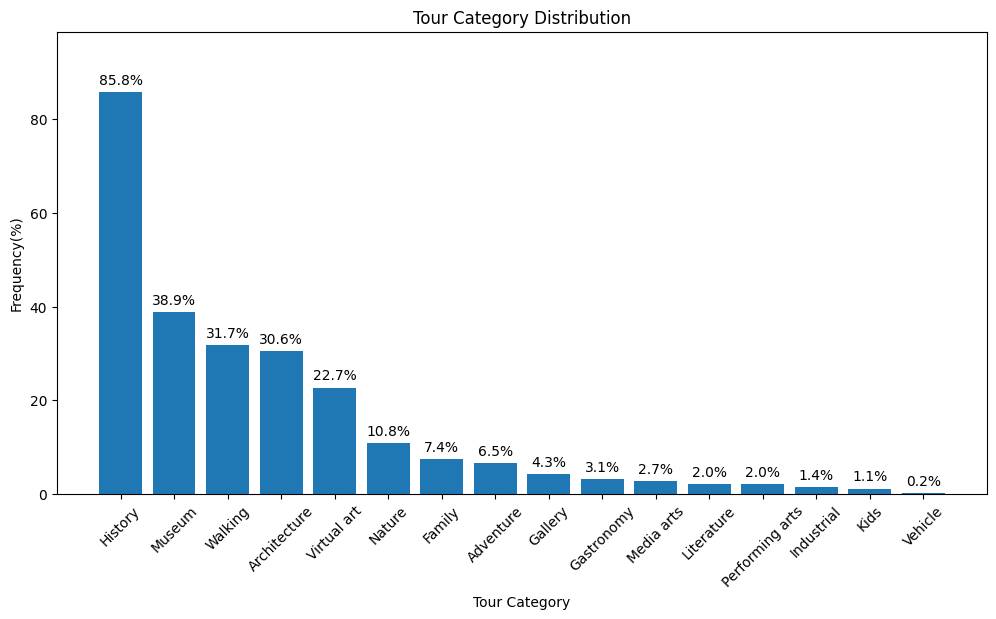

In [262]:

plt.figure(figsize=(12,6))
tour_cat_freq = (df_tour_cat.groupby('tour_category_name')['tour_id'].nunique() / df_tour_cat['tour_id'].nunique() * 100) \
                        .reset_index(name='frequency') \
                        .sort_values(by='frequency', ascending=False)

tour_cat_freq['frequency'] = round(tour_cat_freq['frequency'], 2)

bars = plt.bar(tour_cat_freq['tour_category_name'], tour_cat_freq['frequency'])
plt.xlabel("Tour Category")
plt.ylabel("Frequency(%)")
plt.title("Tour Category Distribution")
plt.xticks(rotation=45)

# Add percentage labels above bars
for bar, pct in zip(bars, tour_cat_freq["frequency"]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1,  # +1 to lift above bar
             f"{pct:.1f}%", ha='center', va='bottom')

plt.ylim(0, max(tour_cat_freq["frequency"]) * 1.15)  # Extra space above bars
plt.show()

### Tour Category Selection for `item_features` Matrix

To ensure meaningful and manageable input for the `item_features` matrix:

- We include **tour categories with frequency ≥ 2%**, covering the majority of tours:
  - History (85.84%)
  - Museum (38.88%)
  - Walking (31.69%)
  - Architecture (30.56%)
  - Virtual art (22.70%)
  - Nature (10.79%)
  - Family (7.42%)
  - Adventure (6.52%)
  - Gallery (4.27%)
  - Gastronomy (3.15%)
  - Media arts (2.70%)
  - Literature (2.02%)
  - Performing arts (2.02%)

- The remaining low-frequency categories (`Industrial`, `Kids`, `Vehicle`) are grouped into: **`Tour_Category_Other`**


##### Load <code>difficulty_levels_v1.csv</code>

In [263]:
df_diff_levels = pd.read_csv("../data/cleaned_data/difficulty_levels_v1.csv")
df_diff_levels

,id,difficulty
0,0,Easy
1,1,Mild
2,2,Difficult
3,3,Hard


In [264]:
df_diff_levels.rename(columns = {'id': 'difficulty_id', 'difficulty': 'difficulty_name'}, inplace=True)

In [265]:
df_diff_levels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   difficulty_id    4 non-null      int64 
 1   difficulty_name  4 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


In [266]:
df_difficulty = df_story_cat[['story_id', 'difficulty_id']]
df_difficulty.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16921 entries, 0 to 19771
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   story_id       16921 non-null  int64
 1   difficulty_id  5772 non-null   Int64
dtypes: Int64(1), int64(1)
memory usage: 413.1 KB


In [267]:
df_difficulty = df_difficulty.merge(df_diff_levels, on='difficulty_id', how='left')
df_difficulty.head()

,story_id,difficulty_id,difficulty_name
0,5,<NA>,NaN
1,6,<NA>,NaN
2,7,<NA>,NaN
3,8,<NA>,NaN
4,9,<NA>,NaN


In [268]:
df_difficulty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   story_id         16921 non-null  int64 
 1   difficulty_id    5772 non-null   Int64 
 2   difficulty_name  5772 non-null   object
dtypes: Int64(1), int64(1), object(1)
memory usage: 413.2+ KB


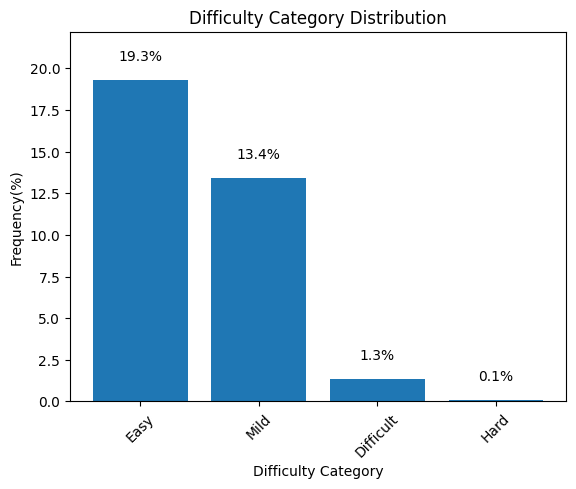

In [269]:
diff_cat_freq = (df_difficulty.groupby('difficulty_name')['story_id'].nunique() / df_difficulty['story_id'].nunique() * 100) \
                        .reset_index(name='frequency') \
                        .sort_values(by='frequency', ascending=False)

diff_cat_freq['frequency'] = round(diff_cat_freq['frequency'], 2)

bars = plt.bar(diff_cat_freq['difficulty_name'], diff_cat_freq['frequency'])
plt.xlabel("Difficulty Category")
plt.ylabel("Frequency(%)")
plt.title("Difficulty Category Distribution")
plt.xticks(rotation=45)

# Add percentage labels above bars
for bar, pct in zip(bars, diff_cat_freq["frequency"]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1,  # +1 to lift above bar
             f"{pct:.1f}%", ha='center', va='bottom')

plt.ylim(0, max(diff_cat_freq["frequency"]) * 1.15)  # Extra space above bars
plt.show()

### Encoding `difficulty` Feature for `item_features` Matrix

The `difficulty` attribute is available for only **34%** of all stories and is distributed as follows:

- Easy: 19.30%
- Mild: 13.42%
- Difficult: 1.32%
- Hard: 0.08%

To balance information value and sparsity:

1. **Group low-frequency levels**:
   - Combine `"Difficult"` and `"Hard"` into a new category: **`High_Difficulty`** (total 1.4%).

2. **Impute missing values**:
   - Create a new level: **`Unknown_Difficulty`** to represent stories with no difficulty info (66% of all stories).

3. **Final encoded levels**:
   - `Easy`
   - `Mild`
   - `High_Difficulty`
   - `Unknown_Difficulty` (for missing values)

4. **One-hot encode** these levels to build the `item_features` matrix.

This strategy keeps the model robust, avoids sparsity from rare levels, and preserves the potential value of the difficulty signal.


##### Load <code>story_lang_content_v1.csv</code>

In [270]:
df_story_lang_content = pd.read_csv("../data/cleaned_data/story_lang_content_v1.csv")
df_story_lang_content.head()

,story_id,lang_id,story_reading_time,track_duration
0,5,1,18.0,NaN
1,6,1,30.0,NaN
2,7,1,31.0,NaN
3,8,1,13.0,NaN
4,9,1,27.0,NaN


In [271]:
df_story_lang_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41067 entries, 0 to 41066
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   story_id            41067 non-null  int64  
 1   lang_id             41067 non-null  int64  
 2   story_reading_time  41067 non-null  float64
 3   track_duration      16111 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 1.3 MB


In [272]:
df_story_lang_content = df_story_lang_content.merge(df_story_cat['story_id'], on='story_id')
df_story_lang_content.head()

,story_id,lang_id,story_reading_time,track_duration
0,5,1,18.0,NaN
1,6,1,30.0,NaN
2,7,1,31.0,NaN
3,8,1,13.0,NaN
4,9,1,27.0,NaN


In [273]:
df_story_lang_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35292 entries, 0 to 35291
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   story_id            35292 non-null  int64  
 1   lang_id             35292 non-null  int64  
 2   story_reading_time  35292 non-null  float64
 3   track_duration      13164 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 1.1 MB


##### Load <code>language_v1.csv</code>

In [274]:
df_lang = pd.read_csv("../data/cleaned_data/language_v1.csv")
df_lang.head()

,lang_id,language_abbr
0,1,EL
1,2,EN
2,3,ZH
3,4,IT
4,5,DE


In [275]:
df_lang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   lang_id        18 non-null     int64 
 1   language_abbr  18 non-null     object
dtypes: int64(1), object(1)
memory usage: 420.0+ bytes


In [276]:
df_story_lang_content = df_story_lang_content.merge(df_lang, on='lang_id', how='left')
df_story_lang_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35292 entries, 0 to 35291
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   story_id            35292 non-null  int64  
 1   lang_id             35292 non-null  int64  
 2   story_reading_time  35292 non-null  float64
 3   track_duration      13164 non-null  float64
 4   language_abbr       35292 non-null  object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.3+ MB


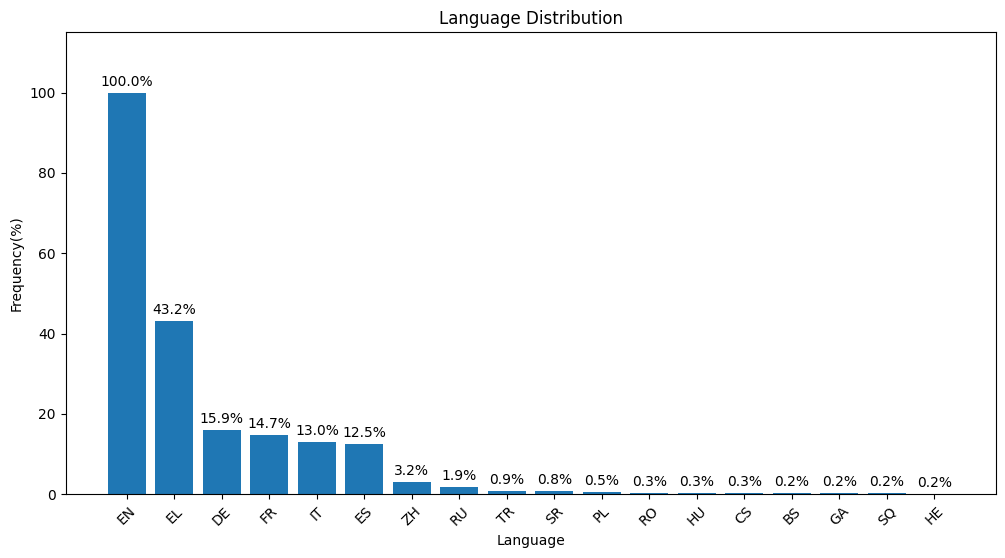

In [277]:
plt.figure(figsize=(12,6))
story_lang_feq = (df_story_lang_content.groupby('language_abbr')['story_id'].nunique() / df_story_lang_content['story_id'].nunique() * 100) \
                        .reset_index(name='frequency') \
                        .sort_values(by='frequency', ascending=False)

story_lang_feq['frequency'] = round(story_lang_feq['frequency'], 2)

bars = plt.bar(story_lang_feq['language_abbr'], story_lang_feq['frequency'])
plt.xlabel("Language")
plt.ylabel("Frequency(%)")
plt.title("Language Distribution")
plt.xticks(rotation=45)

# Add percentage labels above bars
for bar, pct in zip(bars, story_lang_feq["frequency"]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1,  # +1 to lift above bar
             f"{pct:.1f}%", ha='center', va='bottom')

plt.ylim(0, max(story_lang_feq["frequency"]) * 1.15)  # Extra space above bars
plt.show()

### Encoding Story Languages for `item_features_matrix`

The `language_abbr` distribution shows that while **English (EN)** is available for all stories, many other languages appear much less frequently:

- **EN**: 100%
- **EL, DE, FR, IT, ES**: Each appears in ≥10% of stories
- Remaining languages: Each <5% of stories

#### Encoding Strategy:

1. **Include individually** the 6 most common languages:
   - `EN`, `EL`, `DE`, `FR`, `IT`, `ES`

2. **Group all less common languages (<5%)** into a single category:
   - Label as **`Other_Language`**

3. **Multi-label one-hot encoding**:
   - Each story can have multiple language columns with 1s where applicable.
   - e.g., A story in `EN` and `FR` will have both columns set to 1.

This approach avoids excessive sparsity while retaining meaningful multilingual availability information in recommendations.


In [278]:
df_story_lang_content['story_length'] = df_story_lang_content['track_duration'].combine_first(df_story_lang_content['story_reading_time'])

In [279]:
df_agg_story_length = df_story_lang_content.groupby('story_id')['story_length'].median().reset_index()
df_agg_story_length.head(10)

,story_id,story_length
0,5,14.5
1,6,25.5
2,7,35.5
3,8,11.5
4,9,28.0
5,10,20.5
6,11,11.5
7,12,18.5
8,13,34.0
9,14,25.5


In [282]:
df_agg_story_length['story_length'].describe()

count    16921.000000
mean        31.958590
std         18.701674
min          0.000000
25%         22.000000
50%         30.000000
75%         36.500000
max        523.500000
Name: story_length, dtype: float64

In [285]:
# Perform equal-frequency binning
df_agg_story_length['story_length_cat'] = pd.qcut(df_agg_story_length['story_length'], q=3, labels=['Low', 'Medium', 'High'])

df_agg_story_length.head()

,story_id,story_length,story_length_cat
0,5,14.5,Low
1,6,25.5,Low
2,7,35.5,High
3,8,11.5,Low
4,9,28.0,Medium


In [286]:
df_agg_story_length.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   story_id          16921 non-null  int64   
 1   story_length      16921 non-null  float64 
 2   story_length_cat  16921 non-null  category
dtypes: category(1), float64(1), int64(1)
memory usage: 281.2 KB
